# Grad-Cam

The model can be downloaded from https://polybox.ethz.ch/index.php/s/RCyBO2038Aph6Cz


The 10 images used are those that you can find here: https://polybox.ethz.ch/index.php/s/7eLrhKFe34UW3tW

In [1]:
from models.grad_cam import CNN_grad_cam
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils import data


In [2]:
mean1 =torch.tensor([0.5763, 0.5763, 0.5763])
std1  =torch.tensor([0.1453, 0.1453, 0.1453])
std_normalise_1 = transforms.Normalize(
    mean=mean1,
    std=std1
)

trans1 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_1
])

In [3]:
data_for_grad_cam = torchvision.datasets.ImageFolder('img_for_saliency', transform=trans1)
dataloader_grad_cam = data.DataLoader(data_for_grad_cam, shuffle=False, batch_size=1)

### Download the model from:

In [4]:
model_trained = torch.load('models/20_model.pth')

In [5]:
test_grad_cam = CNN_grad_cam(model_trained)

In [6]:
from models.grad_cam import display_datasets_heatmap

0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1


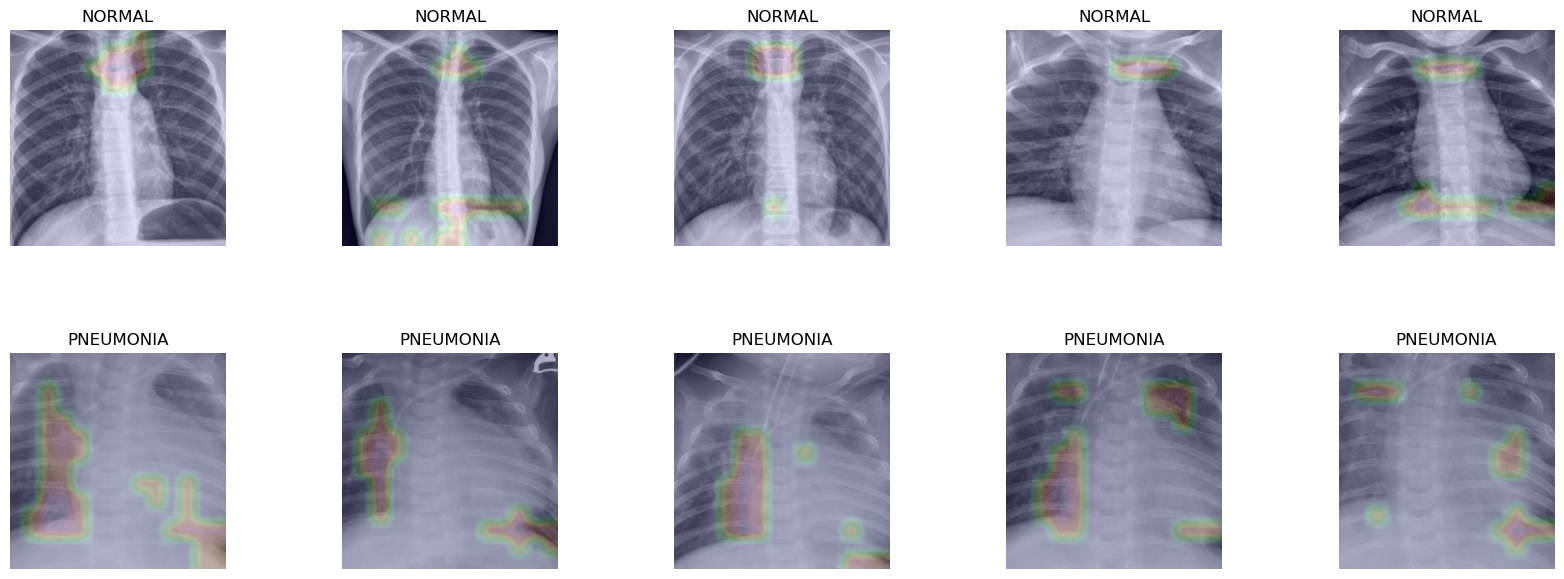

In [9]:
display_datasets_heatmap(test_grad_cam, dataloader_grad_cam)

If you want an output without tresholds on the heatmap use display_datasets_heatmap(...., threshold= 0)